In [1]:
import finesse
import finesse.analysis.actions as fac
import matplotlib.pylab as plt
import finesse.components as fc
import finesse.detectors as fd
import numpy as np
finesse.configure(plotting=True)

In [2]:
# In this notebook, we will solve the quiz1 from the Finesse workshop.

# TASK 1: Build a model similar to the example in the workshop, but with an EOM inserted before the cavity.
# The syntax for adding an EOM is as follows:
# model.add(fc.modulator.Modulator("name", mod_type="pm", midx, f, phase=0))
# where "midx" is the modulation index, "f" is the modulation frequency, and "phase" is the phase shift.

model = finesse.Model()

### Sources ###
laser = model.add(fc.Laser("input",P=1))
mod = model.add(fc.modulator.Modulator("EOM",midx=0.3,f=40e6))

### Mirrors ###
m1 = model.add(fc.Mirror("m1",R=0.9,T=0.1,Rc= -0.7))
m2 = model.add(fc.Mirror("m2",R=0.9,T=0.1,Rc= 0.7))

### Spaces ###
s1 = model.add(fc.Space("s1",portA = laser.p1, portB = mod.p1))
s2 = model.add(fc.Space("s2",portA = mod.p2,portB = m1.p1))
s3 = model.add(fc.Space("s3",portA = m1.p2,portB = m2.p1, L = 1))

### Cavity ###
cav = model.add(fc.Cavity("cav", source = m1.p2.o))

### Detectors ###
p1 = model.add(fd.PowerDetector("Trans",m2.p2.o))
p2 = model.add(fd.PowerDetector("Refl",m1.p1.o))
p3 = model.add(fd.PowerDetector("Circ",m1.p2.i))

In [3]:
# TASK 2: Scan the laser's frequency, or the cavity's length, and see the sidebands in the spectrum.
sol = model.run(fac.Xaxis(laser.f,'lin', -100e6, 100e6, 1000))

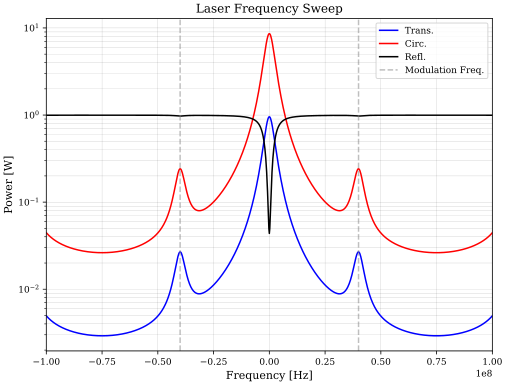

In [4]:
# TASK3
# Confirm that the sidebands are at the expected frequencies. You can add a vertical line at the expected frequency using the following command:
# plt.axvline(x=expected_frequency, color='r', linestyle='--', label='Expected Frequency of SB')
plt.figure(figsize=(8,6))
plt.semilogy(sol.x1,sol["Trans"],label='Trans.')
plt.semilogy(sol.x1,sol["Circ"],label='Circ.')
plt.semilogy(sol.x1,sol["Refl"],label='Refl.')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [W]")
plt.title("Laser Frequency Sweep")
plt.axvline(mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5,label='Modulation Freq.')
plt.axvline(-mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5)
plt.legend()
########## YAYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY

In [5]:
# Bonus Task: Add an amplitude detector and measure the power in the carrier and sidebands.
# The syntax is 
# model.add(det.AmplitudeDetector("name", node, f, n=none, m=none))

a1_0 = model.add(fd.AmplitudeDetector("CarTrans",m2.p2.o,f=0))
a2_0 = model.add(fd.AmplitudeDetector("CarRefl",m1.p1.o,f=0))
a3_0 = model.add(fd.AmplitudeDetector("CarCirc",m1.p2.i,f=0))

a1_m = model.add(fd.AmplitudeDetector("ModTrans",m2.p2.o,f=mod.f))
a2_m = model.add(fd.AmplitudeDetector("ModRefl",m1.p1.o,f=mod.f))
a3_m = model.add(fd.AmplitudeDetector("ModCirc",m1.p2.i,f=mod.f))

a1_m = model.add(fd.AmplitudeDetector("ModTransNeg",m2.p2.o,f=-mod.f))
a2_m = model.add(fd.AmplitudeDetector("ModReflNeg",m1.p1.o,f=-mod.f))
a3_m = model.add(fd.AmplitudeDetector("ModCircNeg",m1.p2.i,f=-mod.f))

In [23]:
sol2 = model.run(fac.Xaxis(m1.phi,'lin', -180, 180, 1000))

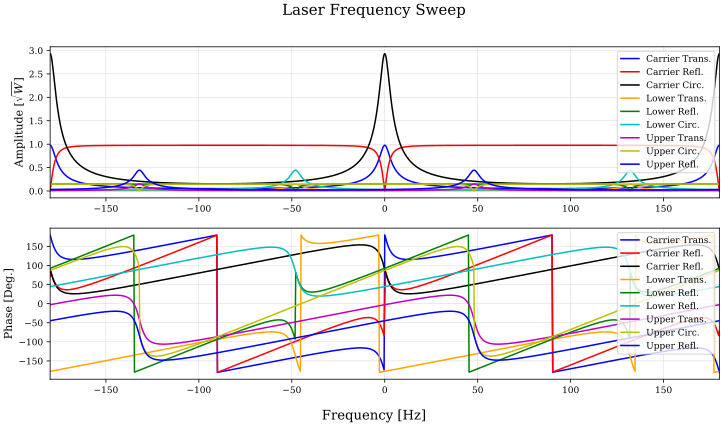

In [25]:
fig,axs = plt.subplots(nrows=2,figsize=(12,6))
axs[0].plot(sol2.x1,np.abs(sol2["CarTrans"]),label='Carrier Trans.')
axs[0].plot(sol2.x1,np.abs(sol2["CarRefl"]),label='Carrier Refl.')
axs[0].plot(sol2.x1,np.abs(sol2["CarCirc"]),label='Carrier Circ.')

axs[0].plot(sol2.x1,np.abs(sol2["ModTrans"]),label='Lower Trans.')
axs[0].plot(sol2.x1,np.abs(sol2["ModRefl"]),label='Lower Refl.')
axs[0].plot(sol2.x1,np.abs(sol2["ModCirc"]),label='Lower Circ.')

axs[0].plot(sol2.x1,np.abs(sol2["ModTransNeg"]),label='Upper Trans.')
axs[0].plot(sol2.x1,np.abs(sol2["ModReflNeg"]),label='Upper Circ.')
axs[0].plot(sol2.x1,np.abs(sol2["ModCircNeg"]),label='Upper Refl.')
##########################################################################
axs[1].plot(sol2.x1,np.angle(sol2["CarTrans"],deg=True),label='Carrier Trans.')
axs[1].plot(sol2.x1,np.angle(sol2["CarRefl"],deg=True),label='Carrier Refl.')
axs[1].plot(sol2.x1,np.angle(sol2["CarCirc"],deg=True),label='Carrier Refl.')

axs[1].plot(sol2.x1,np.angle(sol2["ModTrans"],deg=True),label='Lower Trans.')
axs[1].plot(sol2.x1,np.angle(sol2["ModRefl"],deg=True),label='Lower Refl.')
axs[1].plot(sol2.x1,np.angle(sol2["ModCirc"],deg=True),label='Lower Refl.')

axs[1].plot(sol2.x1,np.angle(sol2["ModTransNeg"],deg=True),label='Upper Trans.')
axs[1].plot(sol2.x1,np.angle(sol2["ModReflNeg"],deg=True),label='Upper Circ.')
axs[1].plot(sol2.x1,np.angle(sol2["ModCircNeg"],deg=True),label='Upper Refl.')
##########################################################################
fig.supxlabel("Frequency [Hz]")
axs[0].set_ylabel(r"Amplitude [$\sqrt{W}$]")
fig.suptitle("Laser Frequency Sweep",fontsize=15)
#axs[0].axvline(mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5,label='Modulation Freq.')
#axs[0].axvline(-mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5)
axs[0].legend()

axs[1].set_ylabel("Phase [Deg.]")
#axs[1].set_title("Laser Frequency Sweep")
#axs[1].axvline(mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5,label='Modulation Freq.')
#axs[1].axvline(-mod.f,0,1,linestyle='dashed',color='grey',alpha=0.5)
axs[1].legend(loc='upper right')